2023-07-12 11:31:17.671591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


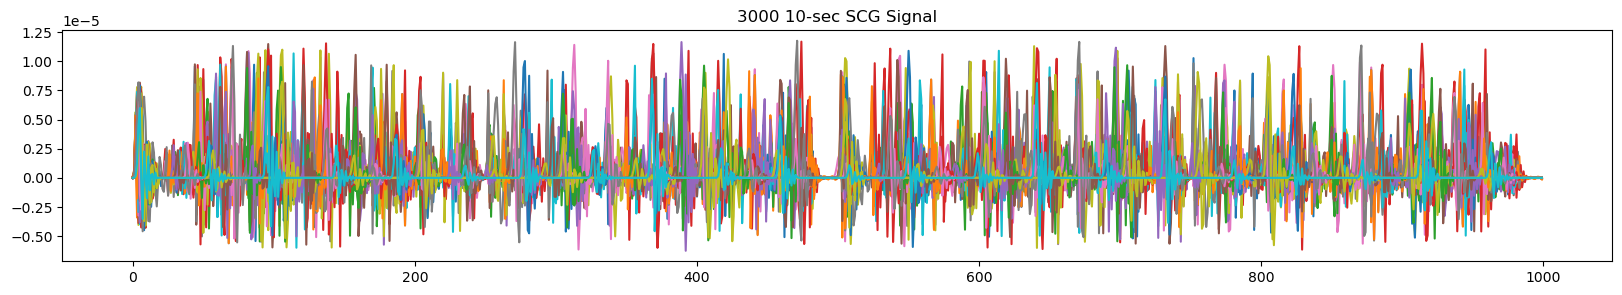

In [1]:
import tsfel
import random
import numpy as np
import pandas as pd
from tsfresh import extract_features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import preprocessing
# import plaidml.keras
# plaidml.keras.install_backend()
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras import layers
from keras import models
from keras.optimizers import Adam
from keras import backend as K

import tensorflow as tf

fs = 100
duration = 10
N = 3000

file_path = '/Users/racheldong/Desktop/Re_Ke/simulator/simulated_dataset.csv'

column_names = [str(i) for i in range(1, duration*fs+1)] + ['heart_rate', 'respiratory_rate', 'systolic', 'diastolic']
df = pd.read_csv(file_path, header=None, names=column_names)
# print(df)


dat = np.array(df)
plt.figure(figsize=(20,3))
plt.plot(np.transpose(dat[:50,:duration*fs]))
plt.title(str(N)+" 10-sec SCG Signal")
plt.show()

In [2]:
signal = df.iloc[:, :-4]
X = signal.values
response = df.iloc[:, -4] #set response as heart rate

In [3]:
column_id = signal.columns.tolist()
# print(X_train)

cfg = tsfel.get_features_by_domain()
feature = tsfel.time_series_features_extractor(cfg, X)

targets = df[['respiratory_rate', 'systolic', 'diastolic']].copy()
targets.index = range(len(targets))

feature = pd.concat([feature,targets],axis=1,ignore_index=False)
feature

*** Feature extraction started ***


/var/folders/xc/kfk35vpj1_x543pqplxyym9w0000gn/T/ipykernel_72948/3574309681.py:5: UserWarning: Using default sampling frequency set in configuration file.
  feature = tsfel.time_series_features_extractor(cfg, X)



*** Feature extraction finished ***


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate,respiratory_rate,systolic,diastolic
0,1.887113e-09,0.000003,1.887113e-09,4.402608,200.0,800.0,-1.253240e-08,1.456851e-07,0.001,0.002,...,1.899670e-12,2.016709e-12,1.884352e-12,1.534041e-12,1.224065e-12,1.071784e-12,517.0,18.0,116.0,77.0
1,8.447471e-10,0.000002,8.447471e-10,4.349928,200.0,800.0,-1.727547e-09,6.079821e-08,0.001,0.002,...,8.747667e-13,8.854605e-13,9.001017e-13,8.364179e-13,6.985518e-13,5.510491e-13,479.0,15.0,102.0,90.0
2,1.490593e-09,0.000003,1.490593e-09,4.022553,200.0,800.0,-3.101526e-09,1.012200e-07,0.001,0.002,...,1.397772e-12,1.437073e-12,1.455361e-12,1.344706e-12,1.123245e-12,8.908061e-13,487.0,12.0,95.0,100.0
3,2.742487e-09,0.000005,2.742487e-09,4.719108,200.0,800.0,-6.737149e-09,2.832377e-07,0.001,0.002,...,4.224305e-12,4.269624e-12,4.507272e-12,4.743911e-12,4.681388e-12,4.288877e-12,428.0,16.0,114.0,71.0
4,1.997002e-09,0.000003,1.997002e-09,4.319945,200.0,800.0,-1.551077e-08,1.873730e-07,0.001,0.002,...,2.085751e-12,2.235703e-12,2.165796e-12,1.809663e-12,1.421304e-12,1.186419e-12,513.0,11.0,127.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9.892655e-10,0.000003,9.892655e-10,4.462133,200.0,800.0,-2.157715e-09,6.294212e-08,0.001,0.002,...,1.582962e-12,1.572526e-12,1.562025e-12,1.554832e-12,1.552589e-12,1.559573e-12,447.0,24.0,117.0,74.0
2996,1.023114e-09,0.000002,1.023114e-09,4.654913,200.0,800.0,-2.187188e-08,5.959006e-08,0.001,0.002,...,7.957555e-13,8.585708e-13,9.006660e-13,8.302078e-13,6.842861e-13,5.481741e-13,437.0,10.0,114.0,90.0
2997,1.931698e-09,0.000005,1.931698e-09,4.246994,200.0,800.0,-5.972499e-09,1.840041e-07,0.001,0.002,...,5.587002e-12,5.530524e-12,5.536522e-12,5.580195e-12,5.621848e-12,5.653068e-12,368.0,20.0,134.0,70.0
2998,2.427779e-09,0.000005,2.427779e-09,4.616951,200.0,800.0,-1.080567e-08,2.533337e-07,0.001,0.002,...,3.696261e-12,3.724178e-12,3.903030e-12,4.182075e-12,4.264287e-12,3.985825e-12,437.0,23.0,118.0,99.0


In [4]:
split_index = int(0.7 * len(df))
X_train = feature.iloc[:split_index, :]
X_test = feature.iloc[split_index:, :]
y_train = df.iloc[:split_index, -4]
y_test = df.iloc[split_index:, -4]

In [5]:
## standardize X
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler1.transform(X_train)

scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler1.transform(X_test)

sample_size_train = X_train_scaled.shape[0]
sample_size_test = X_test_scaled.shape[0]
print(sample_size_train)

time_steps_train = X_train_scaled.shape[1]
time_steps_test = X_test_scaled.shape[1]
print(time_steps_train)

input_dimension = 1


## reshape the dataset
X_train_reshape = X_train_scaled.reshape(sample_size_train, time_steps_train, input_dimension)
X_test_reshape = X_test_scaled.reshape(sample_size_test, time_steps_test, input_dimension)

X_train_reshape.shape, X_test_reshape.shape

2100
392


((2100, 392, 1), (900, 392, 1))

class network(object):
    
    def __init__(self, lr):
        self.lr = lr
    
    def Res_block(self, X, n_filters, strides, dilation_rate):
        x = layers.Conv1D(filters=n_filters, kernel_size=3, strides=strides, padding='causal', kernel_initializer= 'he_normal', dilation_rate = dilation_rate)(X)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x) 
        x = layers.Dropout(0.1)(x)
        x = layers.Conv1D(filters=n_filters, kernel_size=3, strides=1, padding='causal', kernel_initializer= 'he_normal', dilation_rate = dilation_rate)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x) 
        x = layers.Dropout(0.1)(x)
        input_x = layers.Conv1D(filters=n_filters, kernel_size=1, strides=strides, padding='same', kernel_initializer= 'he_normal')(X)
        x = layers.add([x, input_x])
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Dropout(0.1)(x)
        return x
    
    def attention_modual(self, x):
        attention = layers.Dense(units=1)(x)
        attention = layers.Flatten()(attention)
        attention = layers.Activation('softmax')(attention)
        attention = layers.Reshape((-1,1))(attention)
        x = layers.multiply([x, attention])
        return x
    
    def forward(self, X):
        self.X = X
        model_input1 = layers.Input(shape=(self.X.shape[1], 
                                          self.X.shape[2]))
        
        x = self.Res_block(model_input1, 16, 1, 1)
        x = self.Res_block(x, 32, 1, 2)
        x = self.Res_block(x, 64, 1, 4)
        x = self.Res_block(x, 128, 1, 8)
        x = self.Res_block(x, 256, 1, 16)
        x = layers.Flatten()(x)
#        x = layers.GlobalAveragePooling1D()(x)

        model_output = layers.Dense(units=1)(x)
        model = models.Model(model_input1 ,model_output)
        
        # compile model
        # optimizer = Adam(learning_rate=self.lr)
        optimizer = Adam(lr=self.lr)

        model.compile(loss = 'mse',#reweight_mse,
              optimizer=optimizer,
              metrics=['mae'])
        model.summary()
        return model
    


model = network(lr = 0.001).forward(X_train_reshape)
history = model.fit(X_train_reshape, 
                  y_train, 
                  batch_size = 16, 
                  epochs=100,
                  verbose=1, 
                  validation_split=0.1, 
                  shuffle=True)


Predictions_train = model.predict(X_train_scaled)
Predictions_test = model.predict(X_test_scaled)

results_table_train = pd.DataFrame({'train_true':y_train, 'train_predicted':Predictions_train[:,0]},
                                   columns = ['train_true','train_predicted'])
results_table_test = pd.DataFrame({'test_true':y_test, 'test_predicted':Predictions_test[:,0]}, 
                             columns = ['test_true','test_predicted'])
results_table_test = results_table_test.reset_index(drop = True)

results_table_train_sorted = results_table_train.sort_values('train_true')
results_table_train_sorted = results_table_train_sorted.reset_index(drop = True)

results_table_test_sorted = results_table_test.sort_values('test_true')
results_table_test_sorted = results_table_test_sorted.reset_index(drop = True)
print(results_table_test_sorted)

# MAE for training data
MAE_trainS = sm.mean_absolute_error(results_table_train.train_true,results_table_train.train_predicted)

# MAE for test data
MAE_testS = sm.mean_absolute_error(results_table_test.test_true,results_table_test.test_predicted)


plt.figure()
## unsorted
plt.subplot(221)
plt.title('S for  Training Data (unsorted)')
plt.plot(results_table_train.train_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_train.train_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,200,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(222)
plt.title('S for  Testing Data (unsorted)')
plt.plot(results_table_test.test_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_test.test_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,200,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

# sorted
plt.subplot(223)
plt.title('S for  Training Data (sorted)')
plt.plot(results_table_train_sorted.train_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_train_sorted.train_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,180,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(224)
plt.title('S for  Testing Data (sorted)')
plt.plot(results_table_test_sorted.test_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_test_sorted.test_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,180,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplots_adjust(top=1.6, bottom=0.30, left=0.10, right=1.60, hspace=0.30,
                    wspace=0.30)

### Another Method: Lasso for capture feature (instead of deep learning)

In [6]:
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train_scaled, y_train)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

selected_features = X_train_scaled_df.columns[lasso.coef_ != 0]
X_train_selected = X_train_scaled_df[selected_features]
X_train_selected

selected_features = X_test_scaled_df.columns[lasso.coef_ != 0]
X_test_selected = X_test_scaled_df[selected_features]
X_test_selected


,0_FFT mean coefficient_102,0_FFT mean coefficient_119,0_FFT mean coefficient_127,0_FFT mean coefficient_15,0_FFT mean coefficient_151,0_FFT mean coefficient_166,0_FFT mean coefficient_167,0_FFT mean coefficient_177,0_FFT mean coefficient_181,0_FFT mean coefficient_19,...,0_Neighbourhood peaks,0_Positive turning points,0_Skewness,0_Spectral decrease,0_Spectral positive turning points,0_Wavelet absolute mean_1,0_Wavelet entropy,0_Zero crossing rate,systolic,diastolic
0,-0.383465,0.960507,-0.107096,-0.401660,1.040613,-0.089488,-0.289939,-0.407774,-0.574786,0.138069,...,-1.085162,0.018674,-0.988045,0.570144,-0.356461,-1.647334,-0.272020,0.219868,-0.655818,0.707531
1,-0.365625,-0.381658,-0.412874,-0.333330,0.807489,-0.350426,0.082866,-0.421776,0.318265,-0.492516,...,-1.085162,0.802968,0.111595,1.179959,0.787332,-1.179273,-0.619035,0.993408,-0.862329,1.128585
2,-0.364989,1.461940,1.206585,-0.386146,-0.438960,1.005251,2.187927,-0.111140,-0.255003,0.519311,...,0.384990,1.014124,0.949433,0.704101,-0.092509,0.971504,0.126818,0.880600,-1.619534,-1.650372
3,-0.393550,-0.178686,-0.449718,-0.394244,-0.435259,-0.386953,-0.237798,1.139967,-0.231064,1.024227,...,0.595011,0.682307,0.886132,1.270932,-0.048517,0.021201,0.417082,0.638869,0.514408,-1.313528
4,-0.396485,-0.422166,-0.492341,-0.392163,0.391608,-0.390298,0.094498,-0.100943,3.859869,-0.507472,...,1.225076,0.833133,-0.208602,0.463643,1.535198,0.320949,1.117833,0.671100,0.376734,1.549639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-0.356426,0.562187,-0.121359,-0.396150,1.831906,-0.238307,-0.291101,-0.412043,-0.527599,0.087245,...,-1.400194,-0.403638,0.150219,0.971131,-0.444446,-1.758715,-0.057335,-0.328056,0.101387,-0.555631
896,-0.396033,-0.375191,-0.411819,-0.395945,0.362889,-0.370687,1.277517,1.747064,-0.156994,-0.506541,...,1.015054,-0.343308,0.544331,1.080846,-0.356461,-0.077915,1.412394,-0.489210,-0.105124,0.791742
897,-0.299863,-0.421983,-0.523974,-0.268961,-0.578265,-0.392202,-0.494508,-0.494693,-0.580486,-0.347465,...,-1.505205,-1.640410,-0.762704,-0.798588,0.171443,-1.759243,-1.568862,-1.601174,1.271613,-0.892474
898,-0.365429,-0.404104,-0.439164,0.009506,-0.399642,-0.319460,-0.450811,-0.329922,0.230743,-0.412301,...,-0.035054,-0.313143,-0.709040,-1.261583,-0.356461,0.796182,-0.177104,-0.489210,0.170224,1.549639


In [7]:
# fit a regression model to check the performance of selected features
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [8]:
# check the prediction value

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4.625569581488568
Root Mean Squared Error: 2.150713737690018
Mean Absolute Error: 1.6080721235704565
R-squared: 0.994819978117352


In [9]:
Predictions_train = model.predict(X_train_selected)
Predictions_test = model.predict(X_test_selected)

results_table_train = pd.DataFrame({'train_true':y_train, 'train_predicted':Predictions_train[:]},
                                   columns = ['train_true','train_predicted'])
results_table_test = pd.DataFrame({'test_true':y_test, 'test_predicted':Predictions_test[:]}, 
                             columns = ['test_true','test_predicted'])

results_table_test = results_table_test.reset_index(drop = True)

results_table_train_sorted = results_table_train.sort_values('train_true')
results_table_train_sorted = results_table_train_sorted.reset_index(drop = True)

results_table_test_sorted = results_table_test.sort_values('test_true')
results_table_test_sorted = results_table_test_sorted.reset_index(drop = True)
print(results_table_test_sorted)

     test_true  test_predicted
0         50.0       47.094146
1         50.0       63.379979
2         50.0       45.156314
3         50.0       49.470433
4         50.0       50.084828
..         ...             ...
895      150.0      151.229125
896      150.0      147.713850
897      150.0      148.247954
898      150.0      146.856685
899      150.0      149.223263

[900 rows x 2 columns]


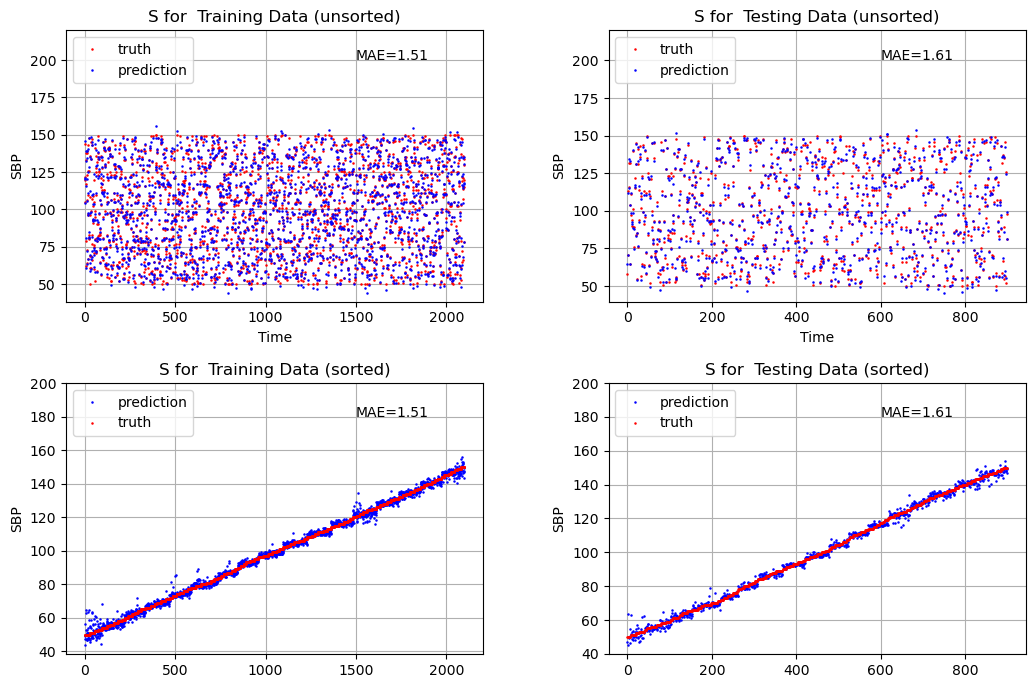

In [10]:
# MAE for training data
MAE_trainS = sm.mean_absolute_error(results_table_train.train_true,results_table_train.train_predicted)

# MAE for test data
MAE_testS = sm.mean_absolute_error(results_table_test.test_true,results_table_test.test_predicted)


plt.figure()
## unsorted
plt.subplot(221)
plt.title('S for  Training Data (unsorted)')
plt.plot(results_table_train.train_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_train.train_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,200,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(222)
plt.title('S for  Testing Data (unsorted)')
plt.plot(results_table_test.test_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_test.test_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,200,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

# sorted
plt.subplot(223)
plt.title('S for  Training Data (sorted)')
plt.plot(results_table_train_sorted.train_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_train_sorted.train_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,180,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(224)
plt.title('S for  Testing Data (sorted)')
plt.plot(results_table_test_sorted.test_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_test_sorted.test_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,180,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplots_adjust(top=1.6, bottom=0.30, left=0.10, right=1.60, hspace=0.30,
                    wspace=0.30)



### Method of ridge(L2 penalty)

In [11]:
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from tsfresh import select_features, extract_features

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled_df, y_train)

ridge_selector = SelectFromModel(ridge, threshold=2)
ridge_selector.fit(X_train_scaled_df, y_train)

ridge_selected_features = X_train_scaled_df.columns[ridge_selector.get_support()]
ridge_X_train_selected = X_train_scaled_df[ridge_selected_features]
ridge_X_train_selected

ridge_X_test_selected = X_test_scaled_df[ridge_selected_features]
ridge_X_test_selected

ridge_selected_features

Index(['0_Absolute energy', '0_Area under the curve', '0_Autocorrelation',
       '0_FFT mean coefficient_10', '0_FFT mean coefficient_11',
       '0_FFT mean coefficient_12', '0_FFT mean coefficient_13',
       '0_FFT mean coefficient_14', '0_FFT mean coefficient_15',
       '0_FFT mean coefficient_23', '0_FFT mean coefficient_25',
       '0_FFT mean coefficient_27', '0_FFT mean coefficient_29',
       '0_FFT mean coefficient_31', '0_FFT mean coefficient_35',
       '0_FFT mean coefficient_37', '0_FFT mean coefficient_8',
       '0_FFT mean coefficient_9', '0_Human range energy', '0_Mean',
       '0_Mean absolute diff', '0_Negative turning points',
       '0_Neighbourhood peaks', '0_Root mean square', '0_Spectral centroid',
       '0_Spectral distance', '0_Spectral kurtosis', '0_Spectral skewness',
       '0_Spectral slope', '0_Spectral spread', '0_Standard deviation',
       '0_Sum absolute diff', '0_Total energy', '0_Variance',
       '0_Wavelet absolute mean_1', '0_Wavelet absolute

In [12]:
# fit a regression model to check the performance of selected features
model = LinearRegression()
model.fit(ridge_X_train_selected, y_train)

# check the prediction value
y_pred = model.predict(ridge_X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4.059057164555346
Root Mean Squared Error: 2.014710193689243
Mean Absolute Error: 1.5241512926351883
R-squared: 0.9954543965743243


In [13]:
Predictions_train = model.predict(ridge_X_train_selected)
Predictions_test = model.predict(ridge_X_test_selected)

results_table_train = pd.DataFrame({'train_true':y_train, 'train_predicted':Predictions_train[:]},
                                   columns = ['train_true','train_predicted'])
results_table_test = pd.DataFrame({'test_true':y_test, 'test_predicted':Predictions_test[:]}, 
                             columns = ['test_true','test_predicted'])

results_table_test = results_table_test.reset_index(drop = True)

results_table_train_sorted = results_table_train.sort_values('train_true')
results_table_train_sorted = results_table_train_sorted.reset_index(drop = True)

results_table_test_sorted = results_table_test.sort_values('test_true')
results_table_test_sorted = results_table_test_sorted.reset_index(drop = True)
print(results_table_test_sorted)

     test_true  test_predicted
0         50.0       46.733921
1         50.0       59.264004
2         50.0       50.091953
3         50.0       48.251681
4         50.0       48.208065
..         ...             ...
895      150.0      145.578103
896      150.0      156.096332
897      150.0      155.671929
898      150.0      150.526760
899      150.0      147.816153

[900 rows x 2 columns]


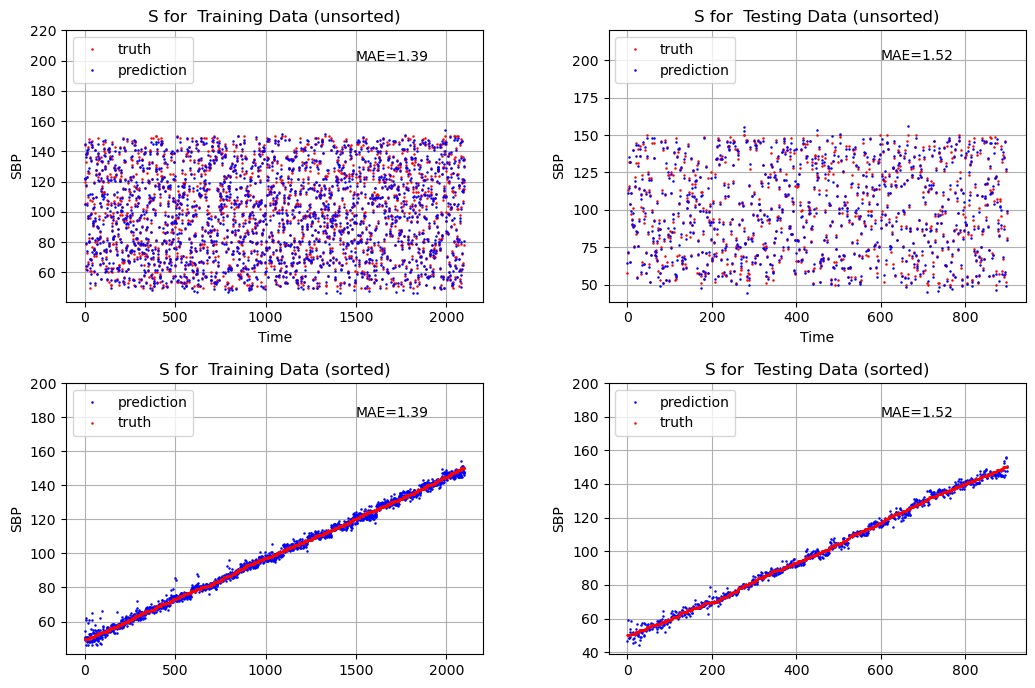

In [14]:
# MAE for training data
MAE_trainS = sm.mean_absolute_error(results_table_train.train_true,results_table_train.train_predicted)

# MAE for test data
MAE_testS = sm.mean_absolute_error(results_table_test.test_true,results_table_test.test_predicted)


plt.figure()
## unsorted
plt.subplot(221)
plt.title('S for  Training Data (unsorted)')
plt.plot(results_table_train.train_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_train.train_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,200,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(222)
plt.title('S for  Testing Data (unsorted)')
plt.plot(results_table_test.test_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_test.test_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,200,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

# sorted
plt.subplot(223)
plt.title('S for  Training Data (sorted)')
plt.plot(results_table_train_sorted.train_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_train_sorted.train_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,180,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(224)
plt.title('S for  Testing Data (sorted)')
plt.plot(results_table_test_sorted.test_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_test_sorted.test_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,180,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplots_adjust(top=1.6, bottom=0.30, left=0.10, right=1.60, hspace=0.30,
                    wspace=0.30)

### Method of Elastic Net (L1+L2)

In [15]:
# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

elastic_net_selector = SelectFromModel(elastic_net, threshold=0.5)
elastic_net_selector.fit(X_train_scaled, y_train)

# elastic_net_selected_features = X_train_scaled_df.columns[elastic_net_selector.get_support()]

coefficients = elastic_net.coef_

# Get the selected features
selected_features = X_train_scaled_df.columns[coefficients != 0]

e_X_train_selected = X_train_scaled_df[elastic_net_selected_features]
e_X_train_selected

e_X_test_selected = X_test_scaled_df[elastic_net_selected_features]
e_X_test_selected

/Users/racheldong/opt/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+03, tolerance: 1.755e+02
  model = cd_fast.enet_coordinate_descent(
/Users/racheldong/opt/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+03, tolerance: 1.755e+02
  model = cd_fast.enet_coordinate_descent(


NameError: name 'elastic_net_selected_features' is not defined

In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Create an instance of SelectKBest with mutual information as the scoring function
sis = SelectKBest(score_func=mutual_info_regression, k=60)

# Fit SIS on the training set
sis.fit(X_train_scaled_df, y_train)

# Get the selected features
selected_features = X_train_scaled_df.columns[sis.get_support(indices=True)]

# Print the selected features
print(selected_features)

Index(['0_FFT mean coefficient_101', '0_FFT mean coefficient_107',
       '0_FFT mean coefficient_12', '0_FFT mean coefficient_139',
       '0_FFT mean coefficient_14', '0_FFT mean coefficient_15',
       '0_FFT mean coefficient_16', '0_FFT mean coefficient_164',
       '0_FFT mean coefficient_165', '0_FFT mean coefficient_17',
       '0_FFT mean coefficient_176', '0_FFT mean coefficient_18',
       '0_FFT mean coefficient_19', '0_FFT mean coefficient_191',
       '0_FFT mean coefficient_193', '0_FFT mean coefficient_20',
       '0_FFT mean coefficient_202', '0_FFT mean coefficient_204',
       '0_FFT mean coefficient_21', '0_FFT mean coefficient_213',
       '0_FFT mean coefficient_214', '0_FFT mean coefficient_223',
       '0_FFT mean coefficient_224', '0_FFT mean coefficient_23',
       '0_FFT mean coefficient_233', '0_FFT mean coefficient_235',
       '0_FFT mean coefficient_236', '0_FFT mean coefficient_24',
       '0_FFT mean coefficient_240', '0_FFT mean coefficient_245',
      

In [17]:
# fit a regression model to check the performance of selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# check the prediction value
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 4.625569581488568
Root Mean Squared Error: 2.150713737690018
Mean Absolute Error: 1.6080721235704565
R-squared: 0.994819978117352


In [18]:
Predictions_train = model.predict(X_train_selected)
Predictions_test = model.predict(X_test_selected)

results_table_train = pd.DataFrame({'train_true':y_train, 'train_predicted':Predictions_train[:]},
                                   columns = ['train_true','train_predicted'])
results_table_test = pd.DataFrame({'test_true':y_test, 'test_predicted':Predictions_test[:]}, 
                             columns = ['test_true','test_predicted'])

results_table_test = results_table_test.reset_index(drop = True)

results_table_train_sorted = results_table_train.sort_values('train_true')
results_table_train_sorted = results_table_train_sorted.reset_index(drop = True)

results_table_test_sorted = results_table_test.sort_values('test_true')
results_table_test_sorted = results_table_test_sorted.reset_index(drop = True)
print(results_table_test_sorted)

     test_true  test_predicted
0         50.0       47.094146
1         50.0       63.379979
2         50.0       45.156314
3         50.0       49.470433
4         50.0       50.084828
..         ...             ...
895      150.0      151.229125
896      150.0      147.713850
897      150.0      148.247954
898      150.0      146.856685
899      150.0      149.223263

[900 rows x 2 columns]


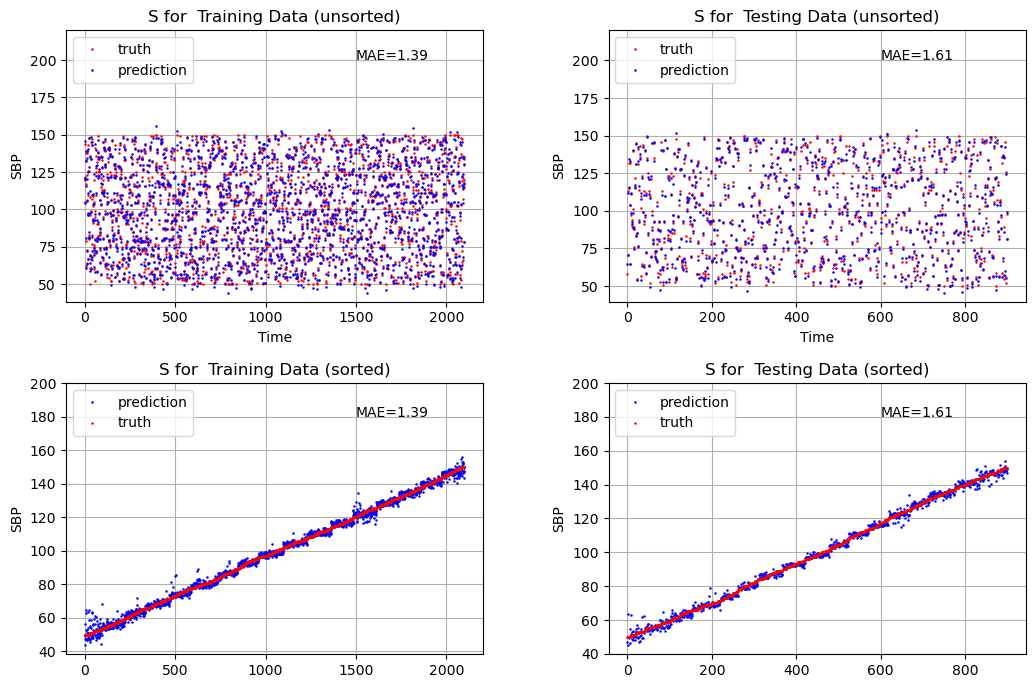

In [19]:
# MAE for test data
MAE_testS = sm.mean_absolute_error(results_table_test.test_true,results_table_test.test_predicted)


plt.figure()
## unsorted
plt.subplot(221)
plt.title('S for  Training Data (unsorted)')
plt.plot(results_table_train.train_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_train.train_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,200,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(222)
plt.title('S for  Testing Data (unsorted)')
plt.plot(results_table_test.test_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_test.test_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,200,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

# sorted
plt.subplot(223)
plt.title('S for  Training Data (sorted)')
plt.plot(results_table_train_sorted.train_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_train_sorted.train_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,180,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(224)
plt.title('S for  Testing Data (sorted)')
plt.plot(results_table_test_sorted.test_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_test_sorted.test_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,180,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplots_adjust(top=1.6, bottom=0.30, left=0.10, right=1.60, hspace=0.30,
                    wspace=0.30)

### Without using tsfel to extract feature & Without selecting feature

In [20]:
X_train = df.iloc[:split_index, list(range(0, 1000)) + list(range(1001, 1004))]
print(X_train)
X_test = df.iloc[split_index:, list(range(0, 1000)) + list(range(1001, 1004))]

## standardize X
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler1.transform(X_train)

scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler1.transform(X_test)

sample_size_train = X_train_scaled.shape[0]
sample_size_test = X_test_scaled.shape[0]
print(sample_size_train)

time_steps_train = X_train_scaled.shape[1]
time_steps_test = X_test_scaled.shape[1]
print(time_steps_train)

input_dimension = 1


## reshape the dataset
X_train_reshape = X_train_scaled.reshape(sample_size_train, time_steps_train, input_dimension)
X_test_reshape = X_test_scaled.reshape(sample_size_test, time_steps_test, input_dimension)

X_train_reshape.shape, X_test_reshape.shape

                 1             2             3         4         5  \
0    -9.281858e-10  5.722819e-07  5.438952e-06  0.000004 -0.000004   
1     1.733409e-09  1.415292e-07  2.988386e-06  0.000004 -0.000003   
2    -9.985923e-10  3.414463e-07  3.797022e-06  0.000005 -0.000003   
3     1.483507e-08  4.010992e-07  2.514697e-06  0.000007  0.000007   
4     9.850124e-09  3.718731e-07  4.072503e-06  0.000006 -0.000004   
...            ...           ...           ...       ...       ...   
2095  1.148931e-08  5.086858e-07  4.549440e-06  0.000007 -0.000003   
2096 -1.749757e-08  5.707384e-08  2.599716e-06  0.000004 -0.000002   
2097  1.753427e-08  5.735857e-07  4.560509e-06  0.000007 -0.000003   
2098 -9.295777e-11  2.607144e-08  4.885170e-07  0.000003  0.000006   
2099 -1.622319e-09  1.396391e-07  2.426852e-06  0.000007 -0.000001   

                 6             7             8             9            10  \
0     2.647285e-06 -1.760946e-06  8.333234e-07 -4.921417e-07 -3.464523e-08   
1  

((2100, 1003, 1), (900, 1003, 1))

model = network(lr = 0.001).forward(X_train_reshape)
history = model.fit(X_train_reshape, 
                  y_train, 
                  batch_size = 16, 
                  epochs=100,
                  verbose=1, 
                  validation_split=0.1, 
                  shuffle=True)


Predictions_train = model.predict(X_train_scaled)
Predictions_test = model.predict(X_test_scaled)

results_table_train = pd.DataFrame({'train_true':y_train, 'train_predicted':Predictions_train[:,0]},
                                   columns = ['train_true','train_predicted'])
results_table_test = pd.DataFrame({'test_true':y_test, 'test_predicted':Predictions_test[:,0]}, 
                             columns = ['test_true','test_predicted'])
results_table_test = results_table_test.reset_index(drop = True)

results_table_train_sorted = results_table_train.sort_values('train_true')
results_table_train_sorted = results_table_train_sorted.reset_index(drop = True)

results_table_test_sorted = results_table_test.sort_values('test_true')
results_table_test_sorted = results_table_test_sorted.reset_index(drop = True)
print(results_table_test_sorted)

# MAE for training data
MAE_trainS = sm.mean_absolute_error(results_table_train.train_true,results_table_train.train_predicted)

# MAE for test data
MAE_testS = sm.mean_absolute_error(results_table_test.test_true,results_table_test.test_predicted)


plt.figure()
## unsorted
plt.subplot(221)
plt.title('S for  Training Data (unsorted)')
plt.plot(results_table_train.train_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_train.train_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,200,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(222)
plt.title('S for  Testing Data (unsorted)')
plt.plot(results_table_test.test_true,'ro',label='truth',markersize=0.8)
plt.plot(results_table_test.test_predicted,'bo',label='prediction',markersize=0.8)
plt.ylim(top=220) 
plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,200,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

# sorted
plt.subplot(223)
plt.title('S for  Training Data (sorted)')
plt.plot(results_table_train_sorted.train_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_train_sorted.train_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(1500,180,"MAE=" +str(round(MAE_trainS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplot(224)
plt.title('S for  Testing Data (sorted)')
plt.plot(results_table_test_sorted.test_predicted,'bo',label='prediction',markersize=0.8)
plt.plot(results_table_test_sorted.test_true,'ro',label='truth',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("SBP")
plt.text(600,180,"MAE=" +str(round(MAE_testS,2)))
plt.legend(loc="upper left")
plt.grid()

plt.subplots_adjust(top=1.6, bottom=0.30, left=0.10, right=1.60, hspace=0.30,
                    wspace=0.30)

In [62]:
import numpy as np
from scipy.signal import find_peaks

def extract_pulse_strength(signal, fs):
    # Preprocessing
    # Apply any necessary preprocessing steps here, such as filtering or baseline drift removal

    # Detection of Cardiac Cycles
    peaks, _ = find_peaks(signal, distance=int(fs * 0.6))  # Adjust the distance parameter as needed

    # Extraction of Pulse Strength Feature
    pulse_strengths = []
    for peak in peaks:
        systolic_phase = signal[peak:peak + int(fs * 0.3)]  # Adjust the duration of the systolic phase as needed
        pulse_strength = np.max(systolic_phase) - np.min(systolic_phase)
        pulse_strengths.append(pulse_strength)

    return pulse_strengths

# Example usage
fs = 100
duration = 10
N = 3000
sampling_rate = 2000  # Sample rate in Hz
pulse_strengths = []

for i in range(df.shape[0]):
    bcg_signal = df.iloc[i, :].values
    pulse_strength = extract_pulse_strength(bcg_signal, sampling_rate)
    pulse_strengths.append(pulse_strength)

pulse_strengths = np.array(pulse_strengths)
pulse_strengths = pulse_strengths.reshape((3000, ))
print(pulse_strengths)

[126. 105. 110. ...  64.  19.  49.]


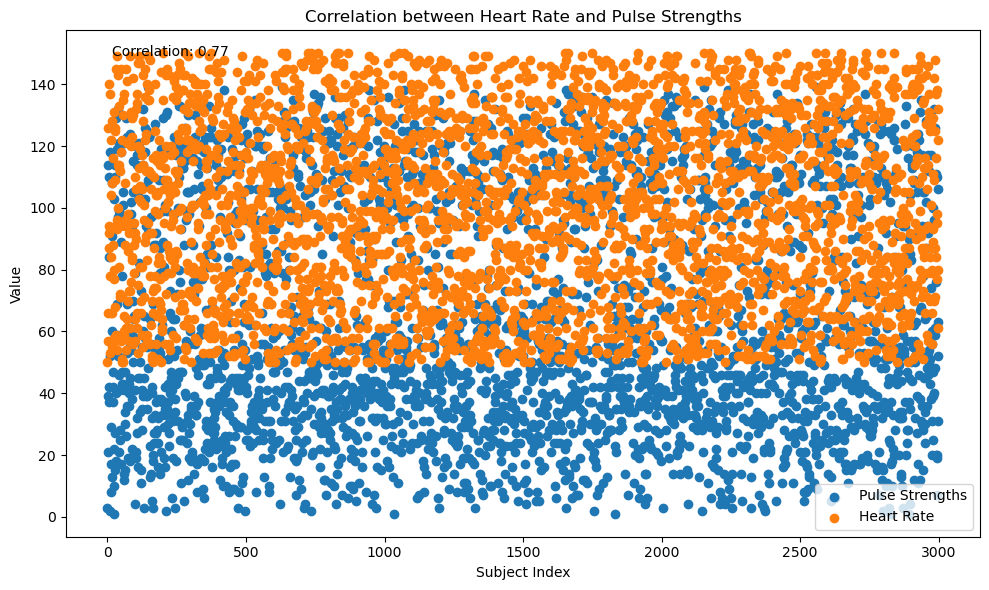

In [63]:
# Assuming pulse_strengths and heart_rate contain the calculated values for each subject
heart_rate = df.iloc[:, -4]
subject_index = np.argsort(pulse_strengths)  # Subject index
correlation = np.corrcoef(pulse_strengths, heart_rate)[0, 1]  # Correlation value

plt.figure(figsize=(10, 6))
plt.scatter(subject_index, pulse_strengths, label='Pulse Strengths')
plt.scatter(subject_index, heart_rate, label='Heart Rate')
plt.xlabel('Subject Index')
plt.ylabel('Value')
plt.title('Correlation between Heart Rate and Pulse Strengths')
plt.legend()

# Add a line showing the correlation value
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [61]:
heart_rate = df.iloc[:, -4]

results_table = pd.DataFrame({'Heart_Rate':heart_rate, 'BPS':pulse_strengths},
                                   columns = ['Heart_Rate','BPS'])

results_table_sorted = results_table.sort_values('Heart_Rate')
results_table_sorted = results_table_sorted.reset_index(drop = True)

print(results_table_sorted)
correlation = np.corrcoef(pulse_strengths, heart_rate)[0, 1]  # Correlation value

      Heart_Rate    BPS
0           50.0   32.0
1           50.0   62.0
2           50.0   23.0
3           50.0   39.0
4           50.0   43.0
...          ...    ...
2995       150.0  131.0
2996       150.0  134.0
2997       150.0  134.0
2998       150.0  136.0
2999       150.0  139.0

[3000 rows x 2 columns]


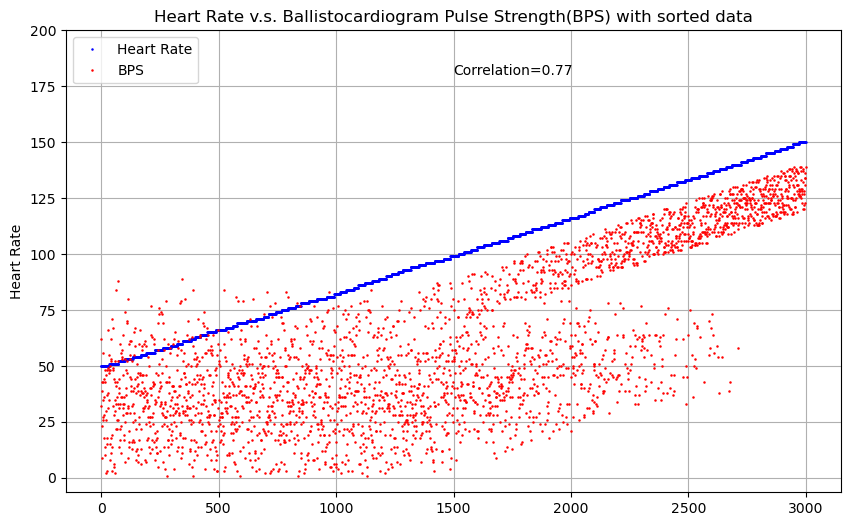

In [56]:
# sorted
plt.figure(figsize=(10, 6))
plt.title('Heart Rate v.s. Ballistocardiogram Pulse Strength(BPS) with sorted data')
plt.plot(results_table_sorted.Heart_Rate,'bo',label='Heart Rate',markersize=0.8)
plt.plot(results_table_sorted.BPS,'ro',label='BPS',markersize=0.8)
plt.ylim(top=200) 
#plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.text(1500,180,"Correlation=" +str(round(correlation,2)))
plt.legend(loc="upper left")
plt.grid()

plt.show()